In [ ]:
import json, os, sys
import networkx as nx
import matplotlib.pyplot as plt
from typing import List
from utils.graph_utils import write_file, extract_msg_file, append_file, chunk_emails, clean_data, split_email_thread


In [1]:
with open('DATA_TUC-KRITI/123456/123456.json', 'r') as file:
    email_list1 = json.load(file)

with open('src/230009_COMDOCS.json', 'r') as file:
    email_list2 = json.load(file)

with open('src/230009_BN.json', 'r') as file:
    email_list3 = json.load(file)

FileNotFoundError: [Errno 2] No such file or directory: 'DATA_TUC-KRITI/123456/123456.json'

In [ ]:
def add_to_graph(graph: nx.DiGraph, email_data: List[str], filename: str) -> nx.DiGraph:
    """
    Add the email data to the graph.
    """
    try:
        filename = filename.split('_')[1].split('.')[0]
        previous_key = None
        start = 1
        
        for n, email in enumerate(email_data):
            for node_key, data in graph.nodes(data=True):
                if data['email_node'] == email:
                    previous_key = node_key
                    start = n

        for n, email in enumerate(email_data[start:], start=start):
            if previous_key is None: 
                ''' Adding new email thread without duplicates '''
                pr_key = 0
            else: 
                pr_key = int(previous_key.split("_")[0])
            key = f"{pr_key+1}_{filename}"
            graph.add_node(key, email_node=email)
            if n>1:
                graph.add_edge(previous_key, key)
            previous_key = key
    except Exception as e:
        print(f"Error adding to graph: {e}: from file: {filename}: {email}")
    return graph


In [107]:
graph = nx.DiGraph()
graph = add_to_graph(graph, email_list1, "123456_PREALERT.msg")
graph = add_to_graph(graph, email_list2, "230009_COMDOCS.json")

In [108]:
graph = add_to_graph(graph, email_list3, "230009_BN.json")

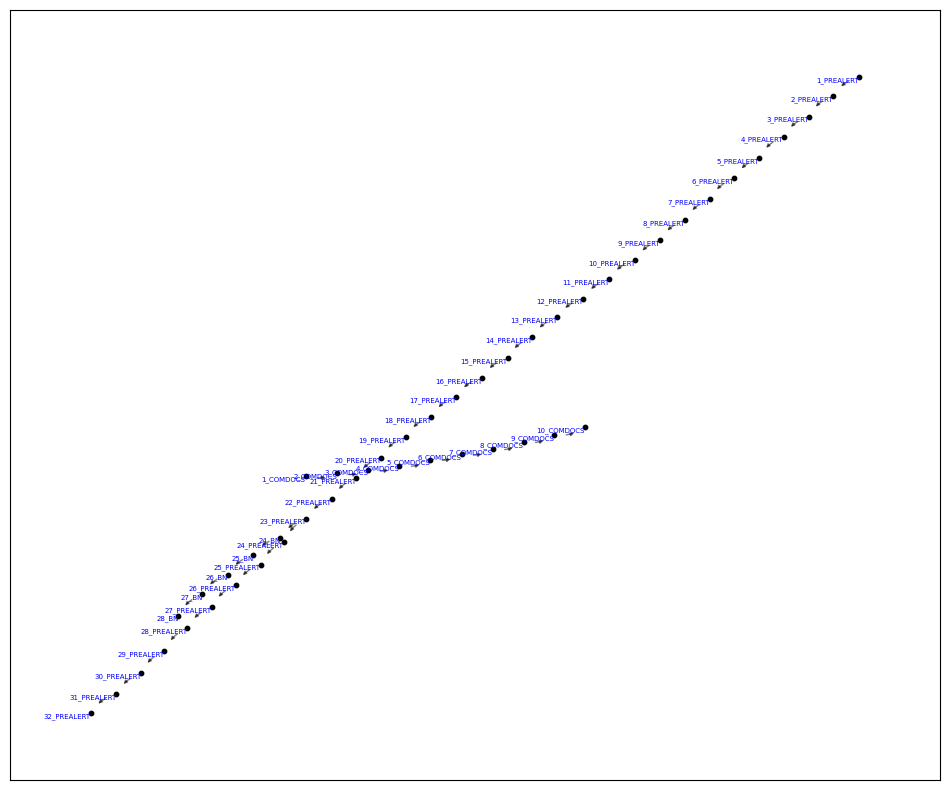

In [109]:
plt.figure(figsize=(12, 10))
pos = nx.kamada_kawai_layout(graph)
node_options = {"node_color": "black", "node_size": 10}
edge_options = {"width": 1, "alpha": 0.5, "edge_color": "black", "arrowsize": 5, "connectionstyle": 'arc3,rad=0.2'}
label_options = {"font_size": 5, "font_color": "blue", "verticalalignment": "top", "horizontalalignment": "right"}
nx.draw_networkx_nodes(graph, pos, **node_options)
nx.draw_networkx_edges(graph, pos, **edge_options)
nx.draw_networkx_labels(graph, pos, **label_options)
plt.show()

```mermaid
graph TD
    A[Input Directory<br>*.msg files] --> B[Preprocessing function]
    B -->|Email Graph| C[Communication Graph Builder]
    C --> D{Supervisor Agent Node}
    D --> E[Agent 1]
    D --> F[Agent 2]
    E -->|Output| D
    F -->|Output| D
    D --> G[Final Output]
    style A fill:#f9f,stroke:#333,color:black
    style B fill:#9f9,stroke:#333,color:black
    style C fill:#99f,stroke:#333,color:black
    style D fill:#f99,stroke:#333,color:black
    style E fill:#ff9,stroke:#333,color:black
    style F fill:#9ff,stroke:#333,color:black
    style G fill:#f9f,stroke:#333,color:black

```mermaid
graph TD
    A[List of .msg files] --> B[Communication Graph Builder]
    B --> C{Supervisor Agent Node}
    C --> |one .msg| D[Preprocessing Agent]
    C --> E[Agent 1]
    C --> F[Agent 2]
    D -->|Processed Data| C
    E -->|Output| C
    F -->|Output| C
    C --> G[Final Output]
    style A fill:#f9f,stroke:#333,color:black
    style B fill:#9f9,stroke:#333,color:black
    style C fill:#99f,stroke:#333,color:black
    style D fill:#f99,stroke:#333,color:black
    style E fill:#ff9,stroke:#333,color:black
    style F fill:#9ff,stroke:#333,color:black
    style G fill:#f9f,stroke:#333,color:black